In [1]:
import cv2
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Conv1D, MaxPool1D

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


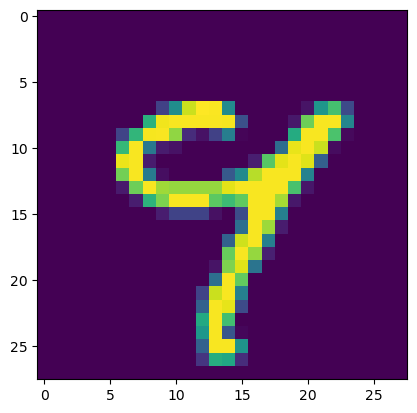

In [4]:
plt.imshow(X_train[54])

In [5]:
y_train[5]

2

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [11]:
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(X_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 12s 4ms/step - loss: 0.2317 - accuracy: 0.9274
Epoch 2/8
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0795 - accuracy: 0.9761
Epoch 3/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0591 - accuracy: 0.9818
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0361 - accuracy: 0.9888
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0290 - accuracy: 0.9909
Epoch 7/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0239 - accuracy: 0.9920
Epoch 8/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0206 - accuracy: 0.9936


In [13]:
convolutional_neural_network.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0623 - accuracy: 0.9830


[0.062265362590551376, 0.9829999804496765]

In [14]:
y_predicted_by_model = convolutional_neural_network.predict(X_test)
y_predicted_by_model[0]

array([1.9851623e-08, 1.3547213e-08, 9.0787424e-08, 3.8936932e-06,
       2.7125631e-07, 5.4443530e-07, 8.8466842e-13, 9.9998808e-01,
       1.1090517e-08, 6.9700741e-06], dtype=float32)

In [15]:
np.argmax(y_predicted_by_model[0])

7

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]

In [17]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = confusion_matrix(y_test, y_predicted_labels)

In [22]:
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.99      0.99       982
           5       0.94      0.99      0.97       892
           6       1.00      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



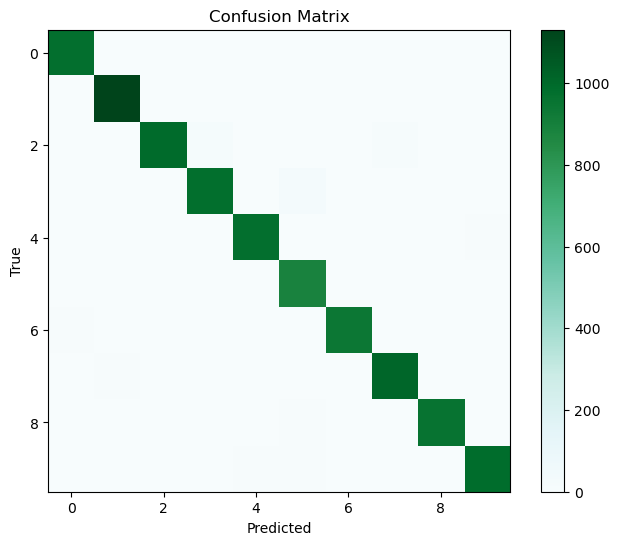

In [26]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.BuGn)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()